<a href="https://colab.research.google.com/github/RoseMwangi98/Hypothyroid_prediction-wk8/blob/main/Hypothyroid_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1)Defining the question**

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

**2)Defining the metrics for success**

Building of a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

**3) Understanding the context**

Knowing the determinant symptoms of hypothroid

**4) Recording the Experimental Design**

Define the question, the metric for success, the context, experimental design taken.
Read and explore the given dataset.
Define the appropriateness of the available data to answer the given question.

Find and deal with outliers, anomalies, and missing data within the dataset.

Perform univariate, bivariate and multivariate analysis recording your observations.
Performing regression analysis.

For this section, you should build a model that makes the above prediction. You should not use individual decision trees, rather you should use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.

Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.
Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction.


**IMPORT THE LIBRARIES**

In [45]:
# Loading my libraries
import pandas as pd 
import numpy as np
import seaborn as sns;sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC , LinearSVC
from sklearn import metrics
from sklearn.metrics import accuracy_score ,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV ,GridSearchCV
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings

import numpy as np
from sklearn.svm import SVC

In [2]:
data=pd.read_csv("hypothyroid.csv")
data.head(4)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [4]:

data.shape

(3163, 26)

In [6]:
data.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

**DATA CLEANING**

In [7]:
data.sex.replace({'?':'M'},inplace=True)

In [8]:
data.replace({"?":np.NAN},inplace=True)
data.isnull().sum()

status                          0
age                           446
sex                             0
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [9]:
data.drop('TBG', axis=1,inplace=True)

In [10]:
#convert the categorical columns into numerical columns
categorical_cols = ['status','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery','query_hypothyroid','query_hyperthyroid',
'pregnant','sick','tumor','lithium','goitre','TSH_measured','T3_measured','TT4_measured','FTI_measured','T4U_measured','TBG_measured']

In [11]:
data[categorical_cols] = pd.get_dummies(data[categorical_cols], drop_first=True)

In [12]:
data.tail(3)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
3160,1,77,1,0,0,0,0,0,0,0,0,0,0,0,1,1.20,1,0.60,1,71,1,0.68,1,104,0
3161,1,74,0,0,0,0,0,0,0,0,0,0,0,0,1,1.30,1,0.10,1,65,1,0.48,1,137,0
3162,1,56,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1.80,1,139,1,0.97,1,143,0


In [13]:
#we replaced the null values with the mean of each column and check if there are missing values present.
num = ['TSH','T3','TT4','T4U','FTI','age']
data[num] =data[num].apply(pd.to_numeric, errors='coerce')

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(data[['TSH','T3','TT4','T4U','FTI','age']])
data[['TSH','T3','TT4','T4U','FTI','age']] = imputer.transform(data[['TSH','T3','TT4','T4U','FTI','age']])

In [15]:
#check if there are missing values
data.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
dtype: int64

In [16]:
#check the datatypes
data.dtypes

status                         uint8
age                          float64
sex                            uint8
on_thyroxine                   uint8
query_on_thyroxine             uint8
on_antithyroid_medication      uint8
thyroid_surgery                uint8
query_hypothyroid              uint8
query_hyperthyroid             uint8
pregnant                       uint8
sick                           uint8
tumor                          uint8
lithium                        uint8
goitre                         uint8
TSH_measured                   uint8
TSH                          float64
T3_measured                    uint8
T3                           float64
TT4_measured                   uint8
TT4                          float64
T4U_measured                   uint8
T4U                          float64
FTI_measured                   uint8
FTI                          float64
TBG_measured                   uint8
dtype: object

In [ ]:
data.shape

(3163, 25)

In [ ]:
data.tail(4)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
3159,1,29.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.8,1,1.8,1,99.0,1,1.01,1,98.0,0
3160,1,77.0,1,0,0,0,0,0,0,0,0,0,0,0,1,1.2,1,0.6,1,71.0,1,0.68,1,104.0,0
3161,1,74.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.3,1,0.1,1,65.0,1,0.48,1,137.0,0
3162,1,56.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.0,1,1.8,1,139.0,1,0.97,1,143.0,0


In [ ]:
data.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,0.952261,51.154214,0.310149,0.145748,0.017389,0.013279,0.032880,0.076193,0.076826,0.019918,0.031299,0.012646,0.000632,0.031299,0.852039,5.923180,0.780272,1.939749,0.921277,108.850000,0.921593,0.978199,0.921910,115.397771,0.082200
std,0.213248,17.881969,0.462627,0.352909,0.130735,0.114483,0.178351,0.265349,0.266357,0.139740,0.174153,0.111760,0.025142,0.174153,0.355117,22.060029,0.414128,0.880441,0.269348,43.657766,0.268853,0.217513,0.268356,57.838927,0.274713
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.500000,1.000000,85.000000,1.000000,0.860000,1.000000,92.000000,0.000000
50%,1.000000,51.154214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.939749,1.000000,107.000000,1.000000,0.978199,1.000000,110.000000,0.000000
75%,1.000000,64.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.923180,1.000000,2.200000,1.000000,124.000000,1.000000,1.050000,1.000000,126.000000,0.000000
max,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,530.000000,1.000000,10.200000,1.000000,450.000000,1.000000,2.210000,1.000000,881.000000,1.000000


**Exploratory Data Analysis**

**Categorical data**

Text(0.5, 1.0, 'Status Countplot')

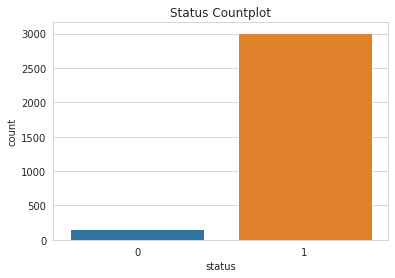

In [ ]:
sns.countplot(x = data['status'])
plt.title('Status Countplot')

Text(0.5, 1.0, 'Status Countplot')

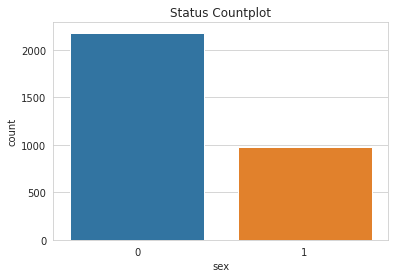

In [ ]:
sns.countplot(x = data['sex'])
plt.title('Status Countplot')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'goitre')

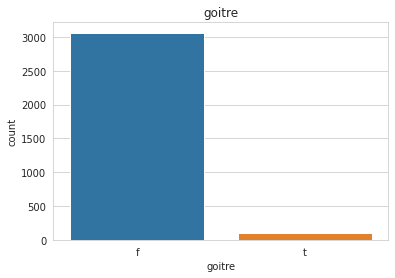

In [ ]:
sns.countplot(data['goitre'])
plt.title("goitre")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'throid_surgery')

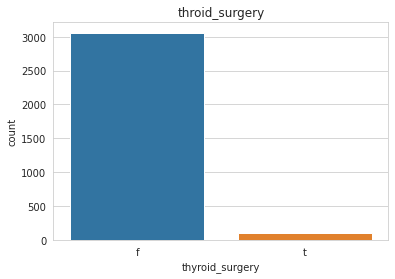

In [ ]:
sns.countplot(data['thyroid_surgery'])
plt.title("throid_surgery")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'pregnant')

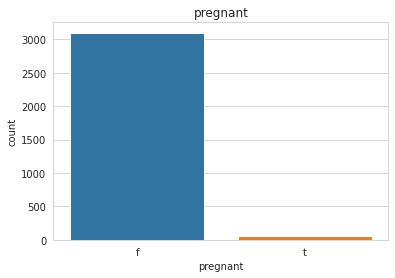

In [ ]:
sns.countplot(data['pregnant'])
plt.title('pregnant')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'on_antithyroid_medication')

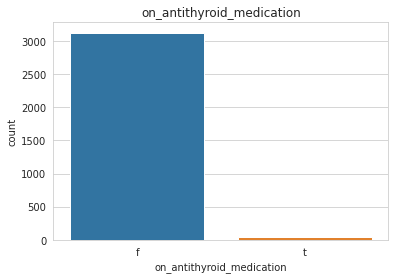

In [ ]:

sns.countplot(data['on_antithyroid_medication'])
plt.title('on_antithyroid_medication')

Text(0.5, 1.0, 'on_thyroxine')

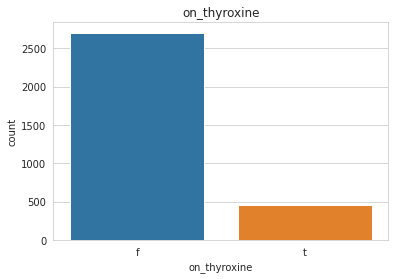

In [ ]:
sns.countplot(x=data['on_thyroxine'])
plt.title("on_thyroxine")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f173f670c50>,
      dtype=object)

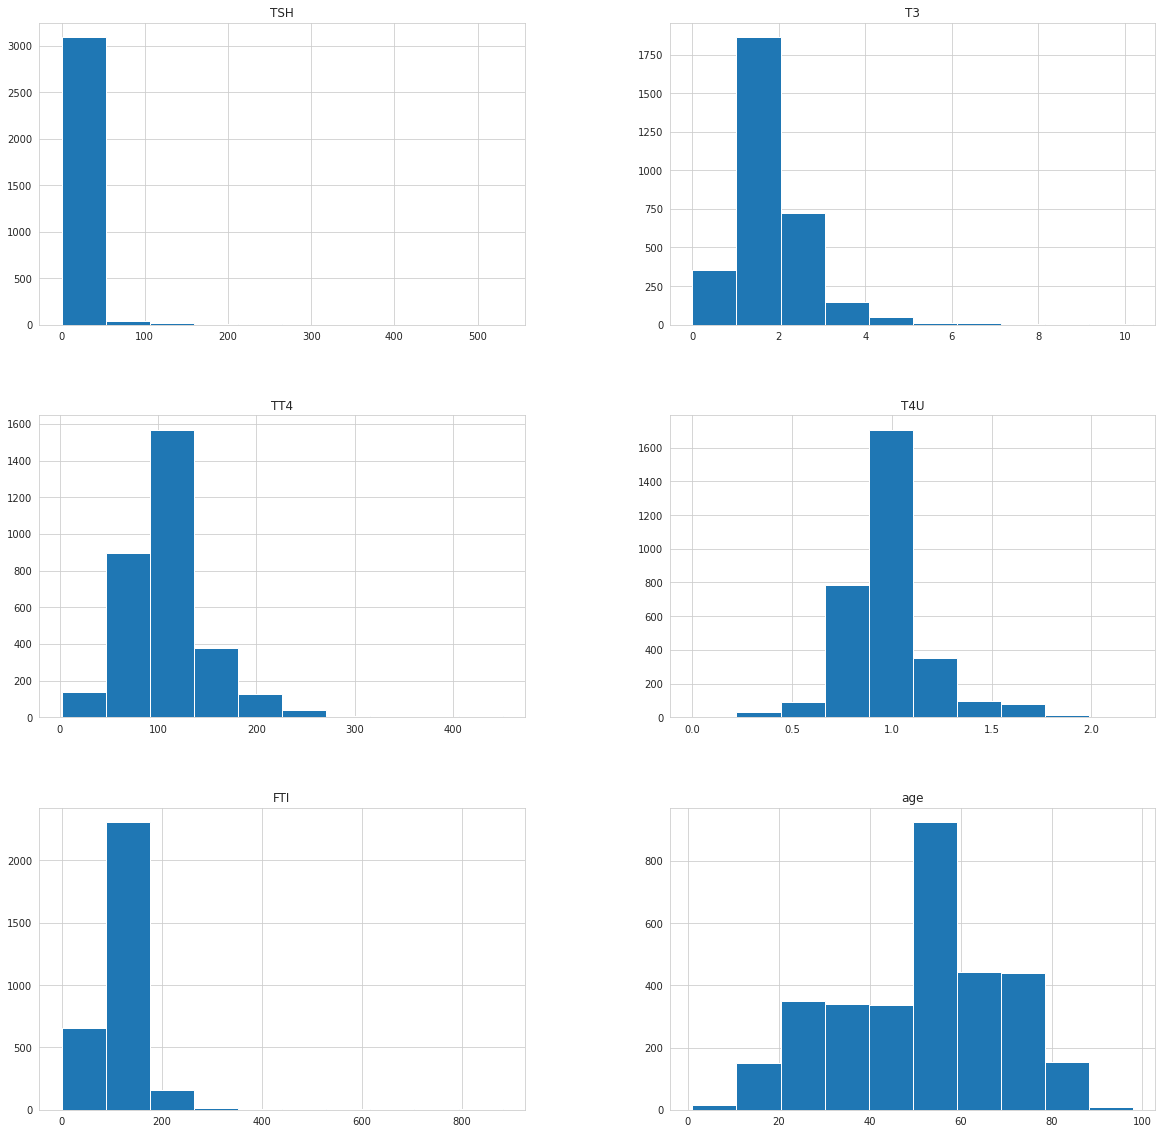

In [ ]:
num = ['TSH','T3','TT4','T4U','FTI','age']
data[num].hist(figsize=(20,20))

<function matplotlib.pyplot.show>

<Figure size 864x576 with 0 Axes>

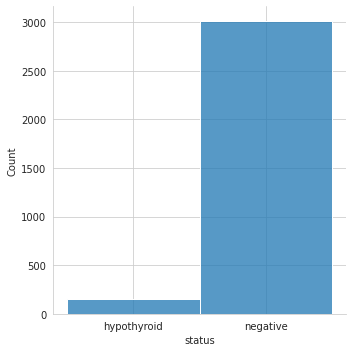

In [ ]:
plt.figure(figsize=(12,8))
sns.displot(data['status'])
plt.show

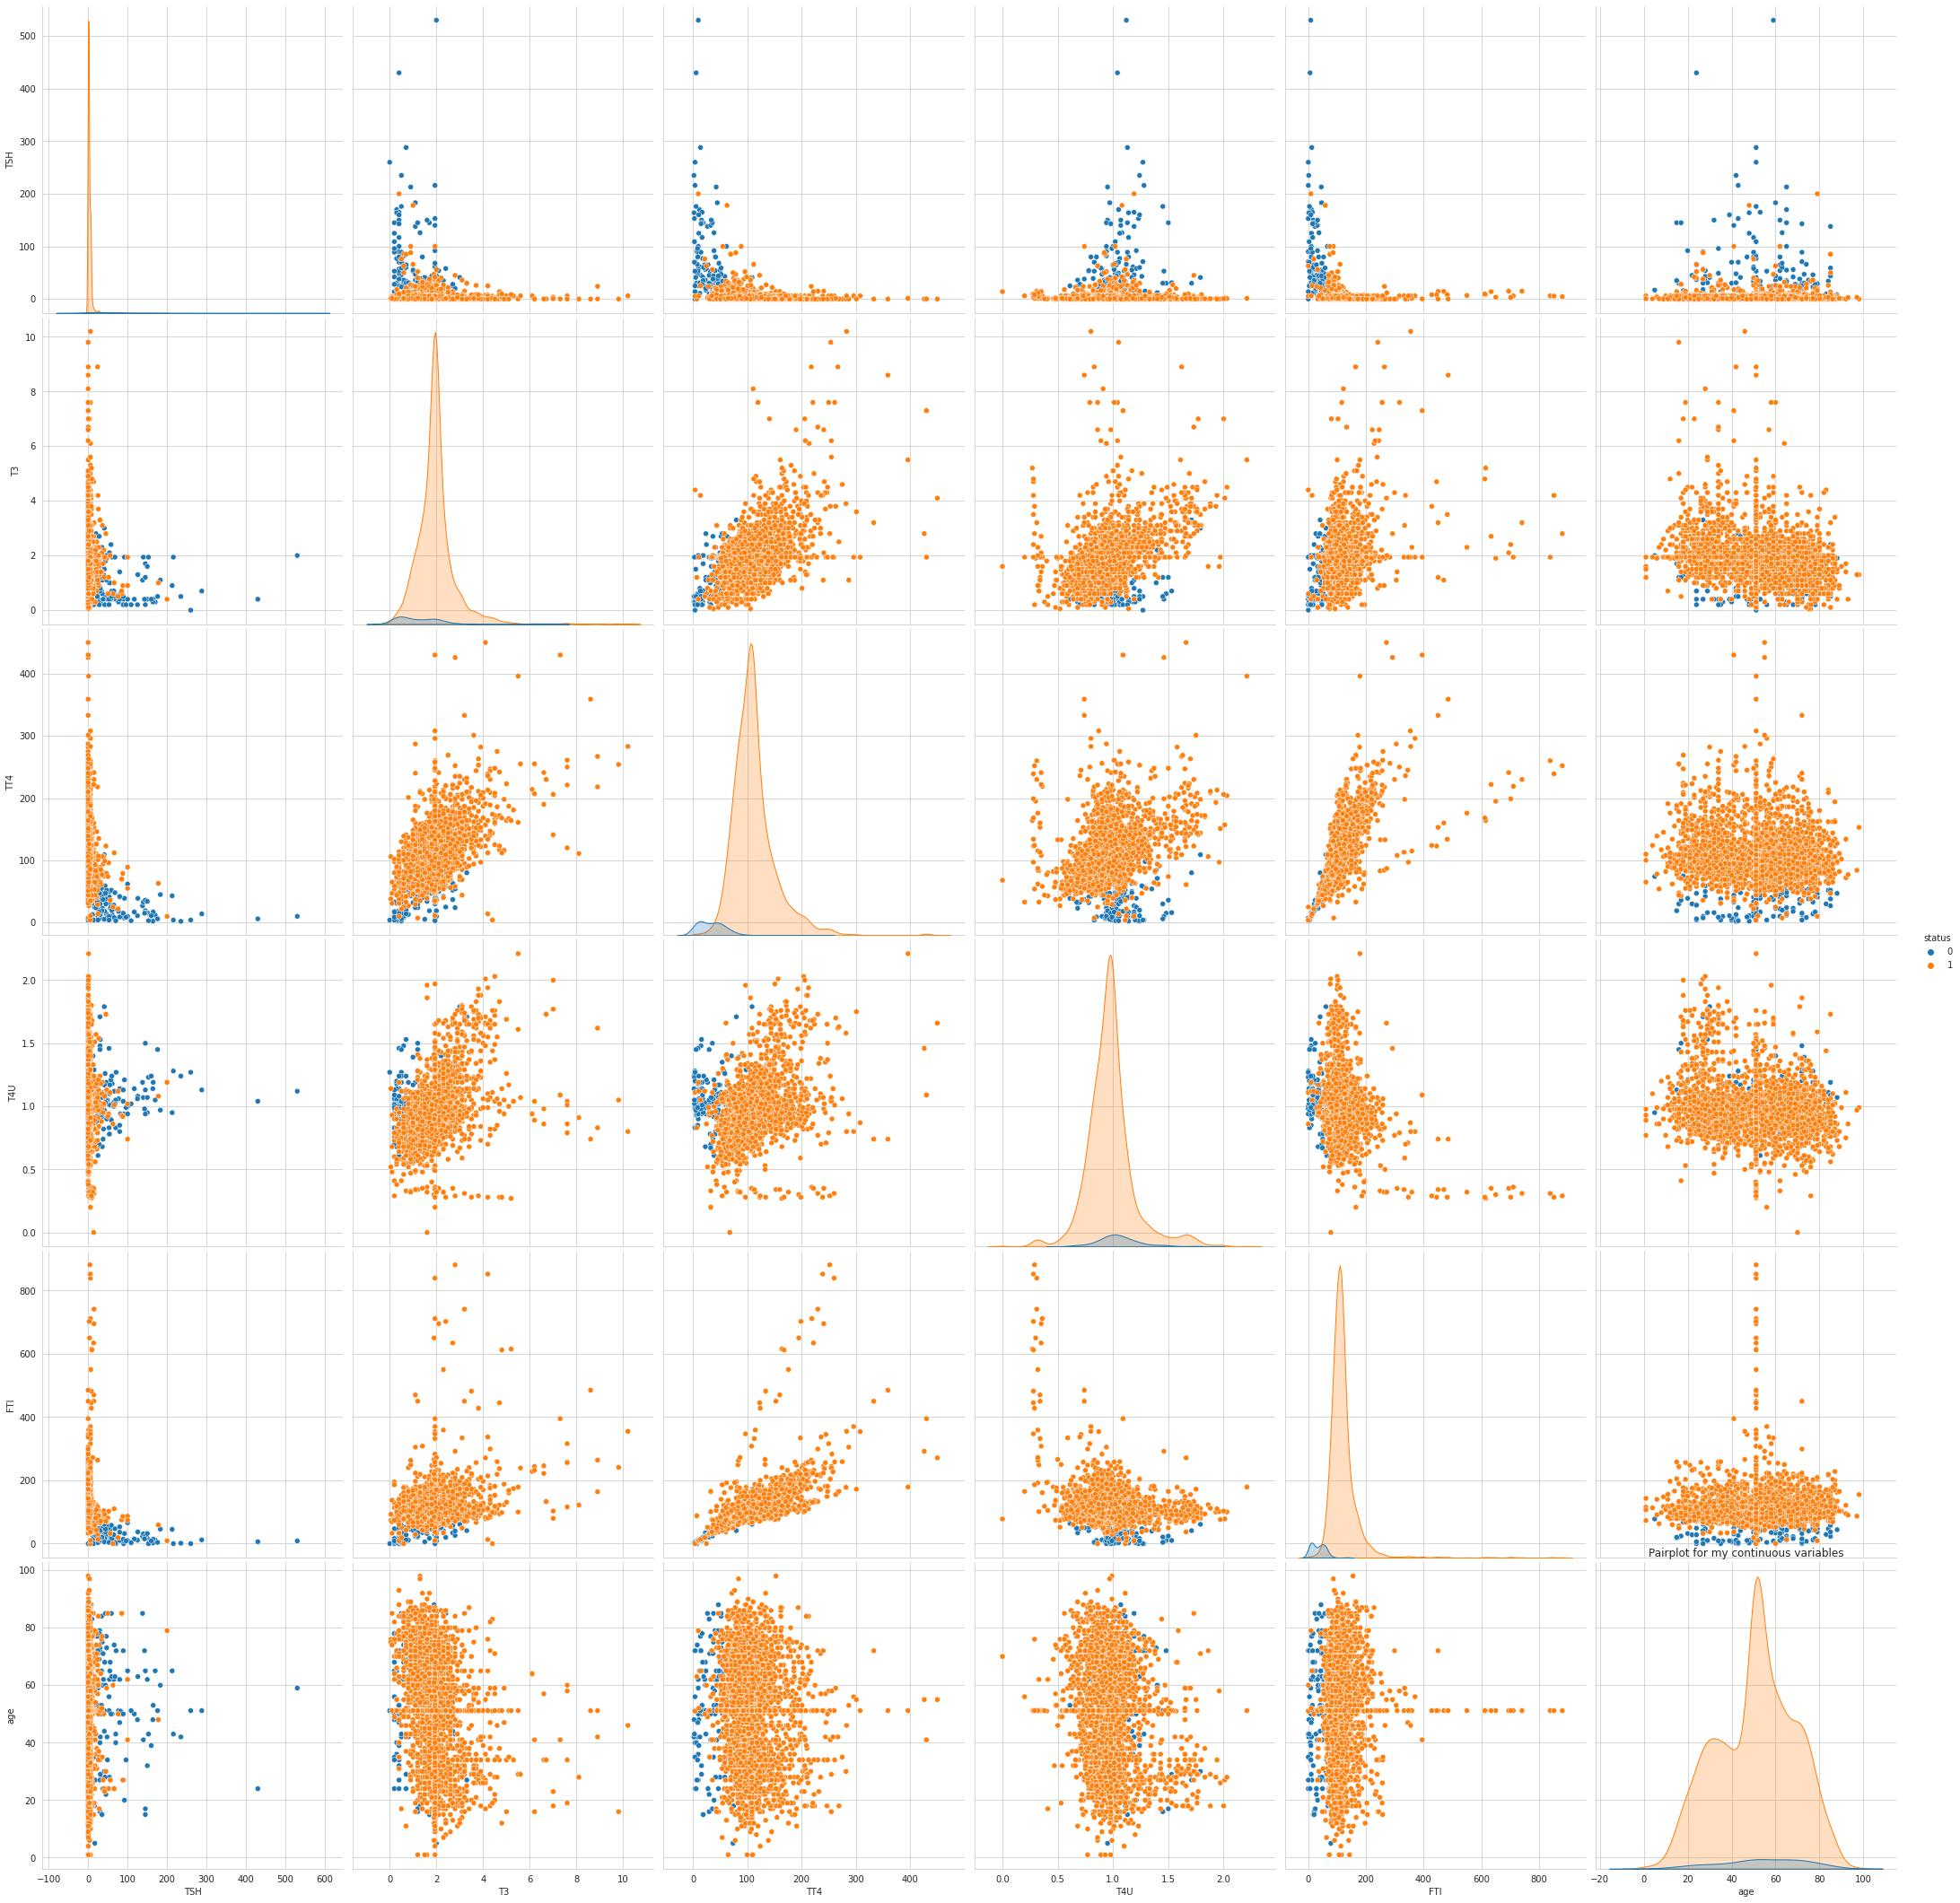

In [ ]:
sns.pairplot(data[['TSH','T3','TT4','T4U','FTI','age','status']], hue="status", height=5);
plt.title("Pairplot for my continuous variables")
plt.show()

**BIVARIATE ANALYSIS**

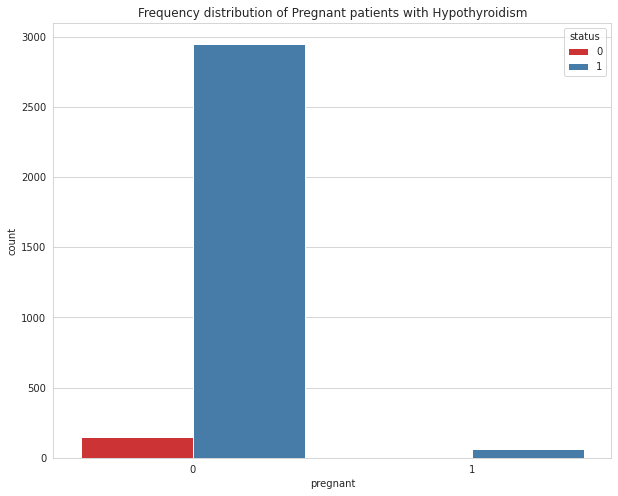

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
ax =sns.countplot(x="pregnant", hue="status", data=data, palette="Set1")
ax.set_title("Frequency distribution of Pregnant patients with Hypothyroidism")
plt.show()

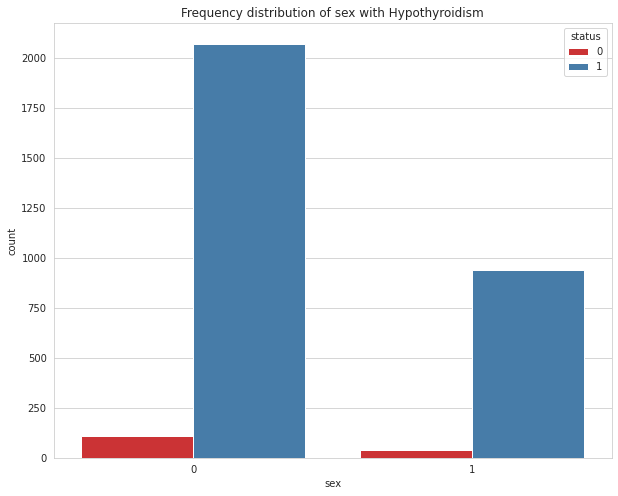

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
ax =sns.countplot(x="sex", hue="status", data=data, palette="Set1")
ax.set_title("Frequency distribution of sex with Hypothyroidism")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


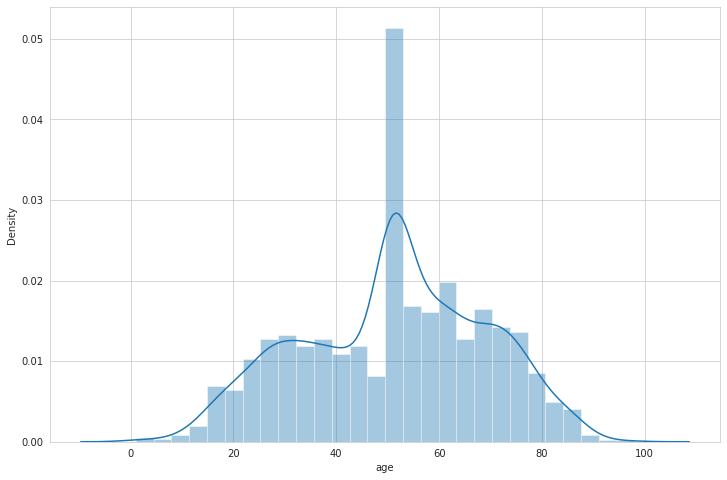

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(data['age'])
plt.show()

In [17]:
corr = data.corr()
corr


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
status,1.000000,-0.035415,0.021903,0.033652,0.029785,0.013020,-0.041868,-0.047477,0.025616,0.021306,0.023216,0.025340,0.005632,-0.010847,-8.912872e-02,-5.820097e-01,-6.868200e-02,1.865430e-01,-6.545094e-02,3.765792e-01,-6.530818e-02,-8.114960e-02,-6.516520e-02,3.162585e-01,0.050812
age,-0.035415,1.000000,0.001927,-0.001492,-0.019763,-0.058943,-0.012284,0.048322,-0.087881,-0.159354,0.064631,-0.063094,-0.021320,-0.037187,2.014359e-01,-7.429077e-03,1.768487e-01,-2.686477e-01,1.263930e-01,-9.117529e-02,1.241160e-01,-1.946565e-01,1.246650e-01,1.546035e-02,-0.128832
sex,0.021903,0.001927,1.000000,-0.129742,0.046756,-0.024042,-0.039308,-0.074057,-0.062536,-0.090695,0.016860,-0.008600,-0.016866,-0.093049,3.301319e-02,-3.499974e-02,1.032577e-01,-6.002796e-02,9.194439e-02,-1.501038e-01,9.132516e-02,-2.578292e-01,9.325147e-02,4.781083e-02,-0.093661
on_thyroxine,0.033652,-0.001492,-0.129742,1.000000,-0.013820,-0.024433,0.029355,0.070498,-0.088877,-0.001168,-0.063956,-0.022691,-0.010390,-0.022790,7.371133e-02,-3.147937e-03,-1.616563e-01,1.880095e-02,6.085599e-02,2.141679e-01,6.048229e-02,7.192532e-02,6.344687e-02,1.135207e-01,-0.064897
query_on_thyroxine,0.029785,-0.019763,0.046756,-0.013820,1.000000,-0.015432,0.016162,-0.019971,-0.038375,-0.018964,-0.023912,0.049880,-0.003346,0.003869,-1.080531e-01,-1.495940e-02,-8.712329e-02,-1.514719e-02,3.888622e-02,-2.009985e-02,3.880140e-02,-3.459826e-02,3.871645e-02,-4.386403e-03,-0.039811
on_antithyroid_medication,0.013020,-0.058943,-0.024042,-0.024433,-0.015432,1.000000,-0.005901,-0.033315,0.122105,0.003231,-0.020852,-0.013129,-0.002918,-0.020852,-2.944865e-02,-1.494155e-03,-1.848694e-02,6.308933e-02,-4.813860e-02,-2.967621e-03,-4.836372e-02,2.579721e-02,-4.858990e-02,-1.741018e-02,0.045730
thyroid_surgery,-0.041868,-0.012284,-0.039308,0.029355,0.016162,-0.005901,1.000000,0.000507,0.020039,-0.013596,-0.033144,-0.020868,-0.004638,-0.022962,3.689035e-02,1.118306e-02,7.928734e-03,-8.658540e-03,7.815542e-03,-1.764577e-02,7.613078e-03,2.400594e-02,7.409903e-03,-2.632235e-02,-0.009997
query_hypothyroid,-0.047477,0.048322,-0.074057,0.070498,-0.019971,-0.033315,0.000507,1.000000,-0.020203,-0.015354,-0.051623,-0.032502,0.040181,-0.024248,5.255328e-02,6.628605e-02,-2.027678e-02,-4.290464e-02,3.970123e-02,-1.491521e-02,3.943660e-02,3.526582e-02,3.917118e-02,-4.675330e-02,-0.042562
query_hyperthyroid,0.025616,-0.087881,-0.062536,-0.088877,-0.038375,0.122105,0.020039,-0.020203,1.000000,0.069333,-0.051854,-0.032648,-0.007256,0.043595,-1.372360e-01,-2.492156e-02,-3.327552e-02,1.888334e-01,-9.200056e-02,1.506073e-01,-9.250933e-02,7.197632e-02,-9.302042e-02,7.763311e-02,0.103840
pregnant,0.021306,-0.159354,-0.090695,-0.001168,-0.018964,0.003231,-0.013596,-0.015354,0.069333,1.000000,-0.025625,0.004117,-0.003586,0.078337,8.422148e-03,-1.393243e-02,3.193077e-02,2.013056e-01,-3.400278e-04,1.654025e-01,-5.083199e-04,3.242593e-01,-6.772365e-04,-7.124221e-03,-0.001472


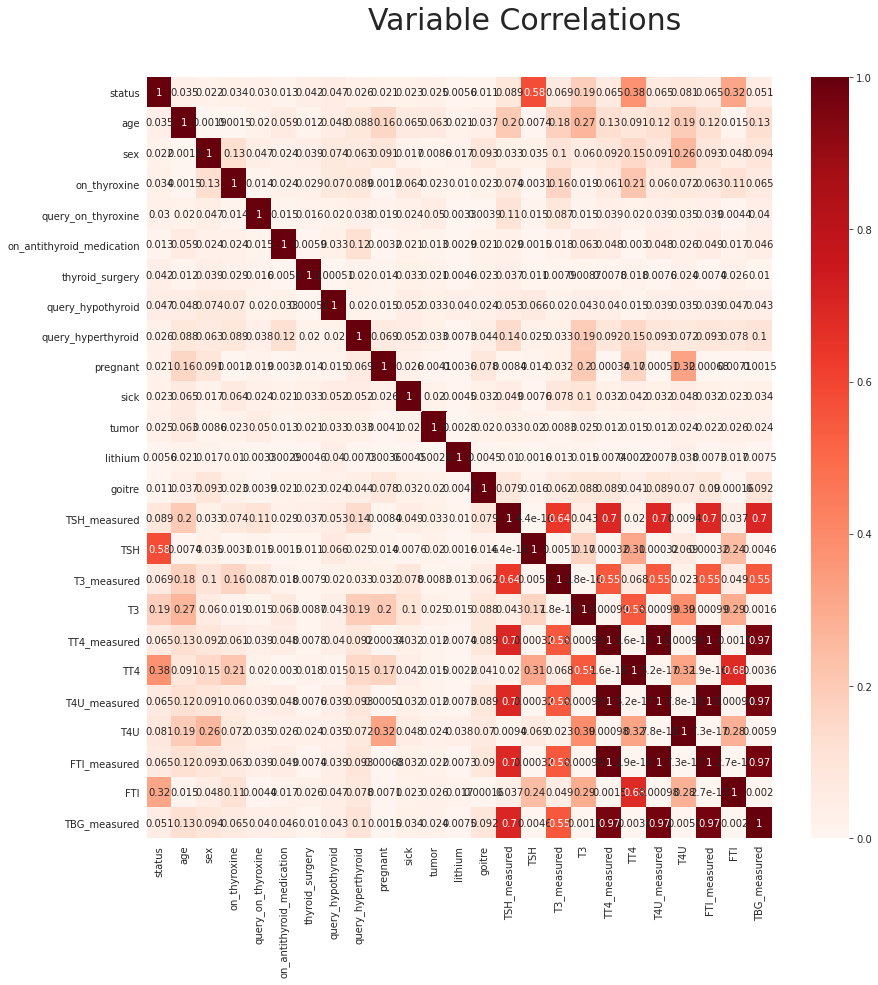

In [18]:
corr = data.corr().abs()
fig, ax=plt.subplots(figsize=(14,14))
fig.suptitle('Variable Correlations', fontsize=30, y=.95)
heatmap = sns.heatmap(corr, cmap='Reds', annot=True)
heatmap
plt.show()

In [19]:
# lithium has no relevance in our data
data.drop('lithium',1)


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,0,72.0,1,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0
1,0,15.0,0,1,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0
2,0,24.0,1,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0
3,0,24.0,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0
4,0,77.0,1,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,1,58.0,0,0,0,0,0,0,0,0,0,0,0,1,5.8,1,1.7,1,86.0,1,0.91,1,95.0,0
3159,1,29.0,0,0,0,0,0,0,0,0,0,0,0,1,0.8,1,1.8,1,99.0,1,1.01,1,98.0,0
3160,1,77.0,1,0,0,0,0,0,0,0,0,0,0,1,1.2,1,0.6,1,71.0,1,0.68,1,104.0,0
3161,1,74.0,0,0,0,0,0,0,0,0,0,0,0,1,1.3,1,0.1,1,65.0,1,0.48,1,137.0,0


**DECISIONS TREES**

In [20]:
#describe the variables
X=data.drop('status',1)
y=data['status']
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
# Fitting a DecisionTreeClassfier Model
dtc = DecisionTreeClassifier()
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
dtc = dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test,y_pred))

Accuracy Score: 0.976303317535545


In [22]:
#tuned the parameters using GridSearch

# Defining the Parameter Range
param_dist = {"max_depth": [3,5,6, None],
              "max_features": [1,2,3,4,5,6,7,8,9,10],
              "min_samples_leaf": [1,2,3,4,5,6,7],
              "criterion": ["gini", "entropy"]}

grid = GridSearchCV(estimator=dtc,param_grid=param_dist,cv=10)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [23]:

#Obtaining the best parameters of my model
print(grid.best_params_)

{'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 5}


In [24]:
# Fitting the hyperparameters to my model.
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=6,max_features=10,min_samples_leaf=4)
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
dtc = dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

In [ ]:
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print('------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,y_pred))
print('------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))

Accuracy Score: 0.9778830963665087
------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.68      0.88      0.77        26
           1       0.99      0.98      0.99       607

    accuracy                           0.98       633
   macro avg       0.84      0.93      0.88       633
weighted avg       0.98      0.98      0.98       633

------------------------------------------------------
Confusion Matrix:
[[ 23   3]
 [ 11 596]]


In [ ]:
# Obtaining the importance of the Features in my model
feature_scores = pd.Series(dtc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

TSH                          0.601260
FTI                          0.344634
T4U                          0.015611
on_antithyroid_medication    0.015031
age                          0.012715
TT4                          0.010498
sex                          0.000252
sick                         0.000000
on_thyroxine                 0.000000
query_on_thyroxine           0.000000
thyroid_surgery              0.000000
query_hypothyroid            0.000000
query_hyperthyroid           0.000000
pregnant                     0.000000
TBG_measured                 0.000000
tumor                        0.000000
goitre                       0.000000
TSH_measured                 0.000000
T3_measured                  0.000000
T3                           0.000000
TT4_measured                 0.000000
T4U_measured                 0.000000
FTI_measured                 0.000000
lithium                      0.000000
dtype: float64

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


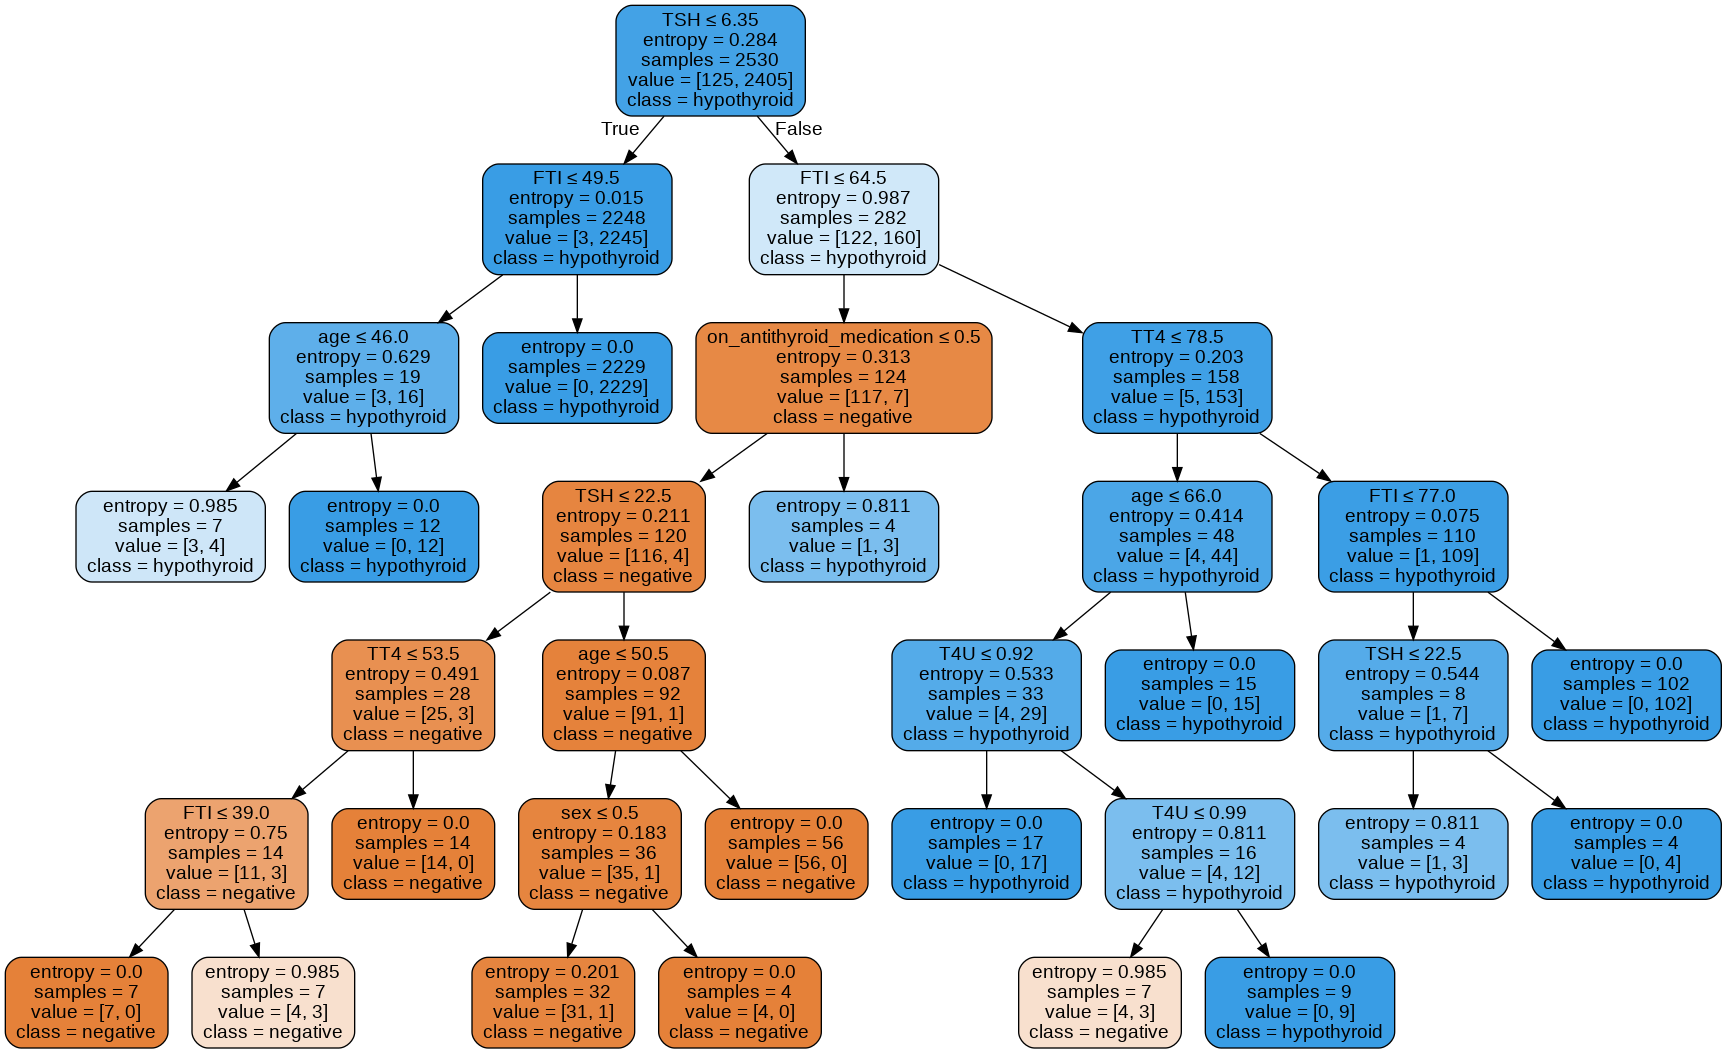

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import io

dot_data = io.StringIO()

#dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['negative', 'hypothyroid'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Thyroid.png')
Image(graph.create_png())

**RANDOM FOREST CLASSIFICATION MODEL**

In [25]:
# Fitting a RandomForestClassifier Model
rfc = RandomForestClassifier()
rfc = rfc.fit(X_train,y_train)
y_predicted = rfc.predict(X_test) 
print(classification_report(y_test,y_predicted))
print("Accuracy Score:", accuracy_score(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        26
           1       0.99      0.99      0.99       607

    accuracy                           0.98       633
   macro avg       0.88      0.88      0.88       633
weighted avg       0.98      0.98      0.98       633

Accuracy Score: 0.981042654028436


In [26]:
# Create the random grid
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True,False]}

grid = RandomizedSearchCV(estimator=rfc,param_distributions=random_grid,cv=10)
grid.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [27]:
grid.best_params_

{'bootstrap': False,
 'max_depth': 90,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1200}

In [28]:
# Fitting the Hyperparameters to my model.
rfc = RandomForestClassifier(n_estimators =1200, min_samples_split= 5, min_samples_leaf= 2, max_features='auto', max_depth= 90, bootstrap=False)
rfc = rfc.fit(X_train,y_train)
y_predicted = rfc.predict(X_test)

In [29]:

print("Accuracy Score:", accuracy_score(y_test,y_pred))
print('------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,y_pred))
print('------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))

Accuracy Score: 0.9747235387045814
------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.68      0.73      0.70        26
           1       0.99      0.99      0.99       607

    accuracy                           0.97       633
   macro avg       0.83      0.86      0.85       633
weighted avg       0.98      0.97      0.98       633

------------------------------------------------------
Confusion Matrix:
[[ 19   7]
 [  9 598]]


In [ ]:
# Obtaining the Feature Importance
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

FTI                          0.350073
TSH                          0.257647
TT4                          0.256157
T3                           0.054436
T4U                          0.030222
age                          0.020017
TSH_measured                 0.005856
on_antithyroid_medication    0.005813
on_thyroxine                 0.004323
query_hypothyroid            0.003727
sex                          0.002380
thyroid_surgery              0.002354
T3_measured                  0.001914
sick                         0.001720
goitre                       0.000899
TBG_measured                 0.000783
query_hyperthyroid           0.000749
TT4_measured                 0.000334
T4U_measured                 0.000257
FTI_measured                 0.000245
pregnant                     0.000042
tumor                        0.000031
query_on_thyroxine           0.000020
lithium                      0.000000
dtype: float64

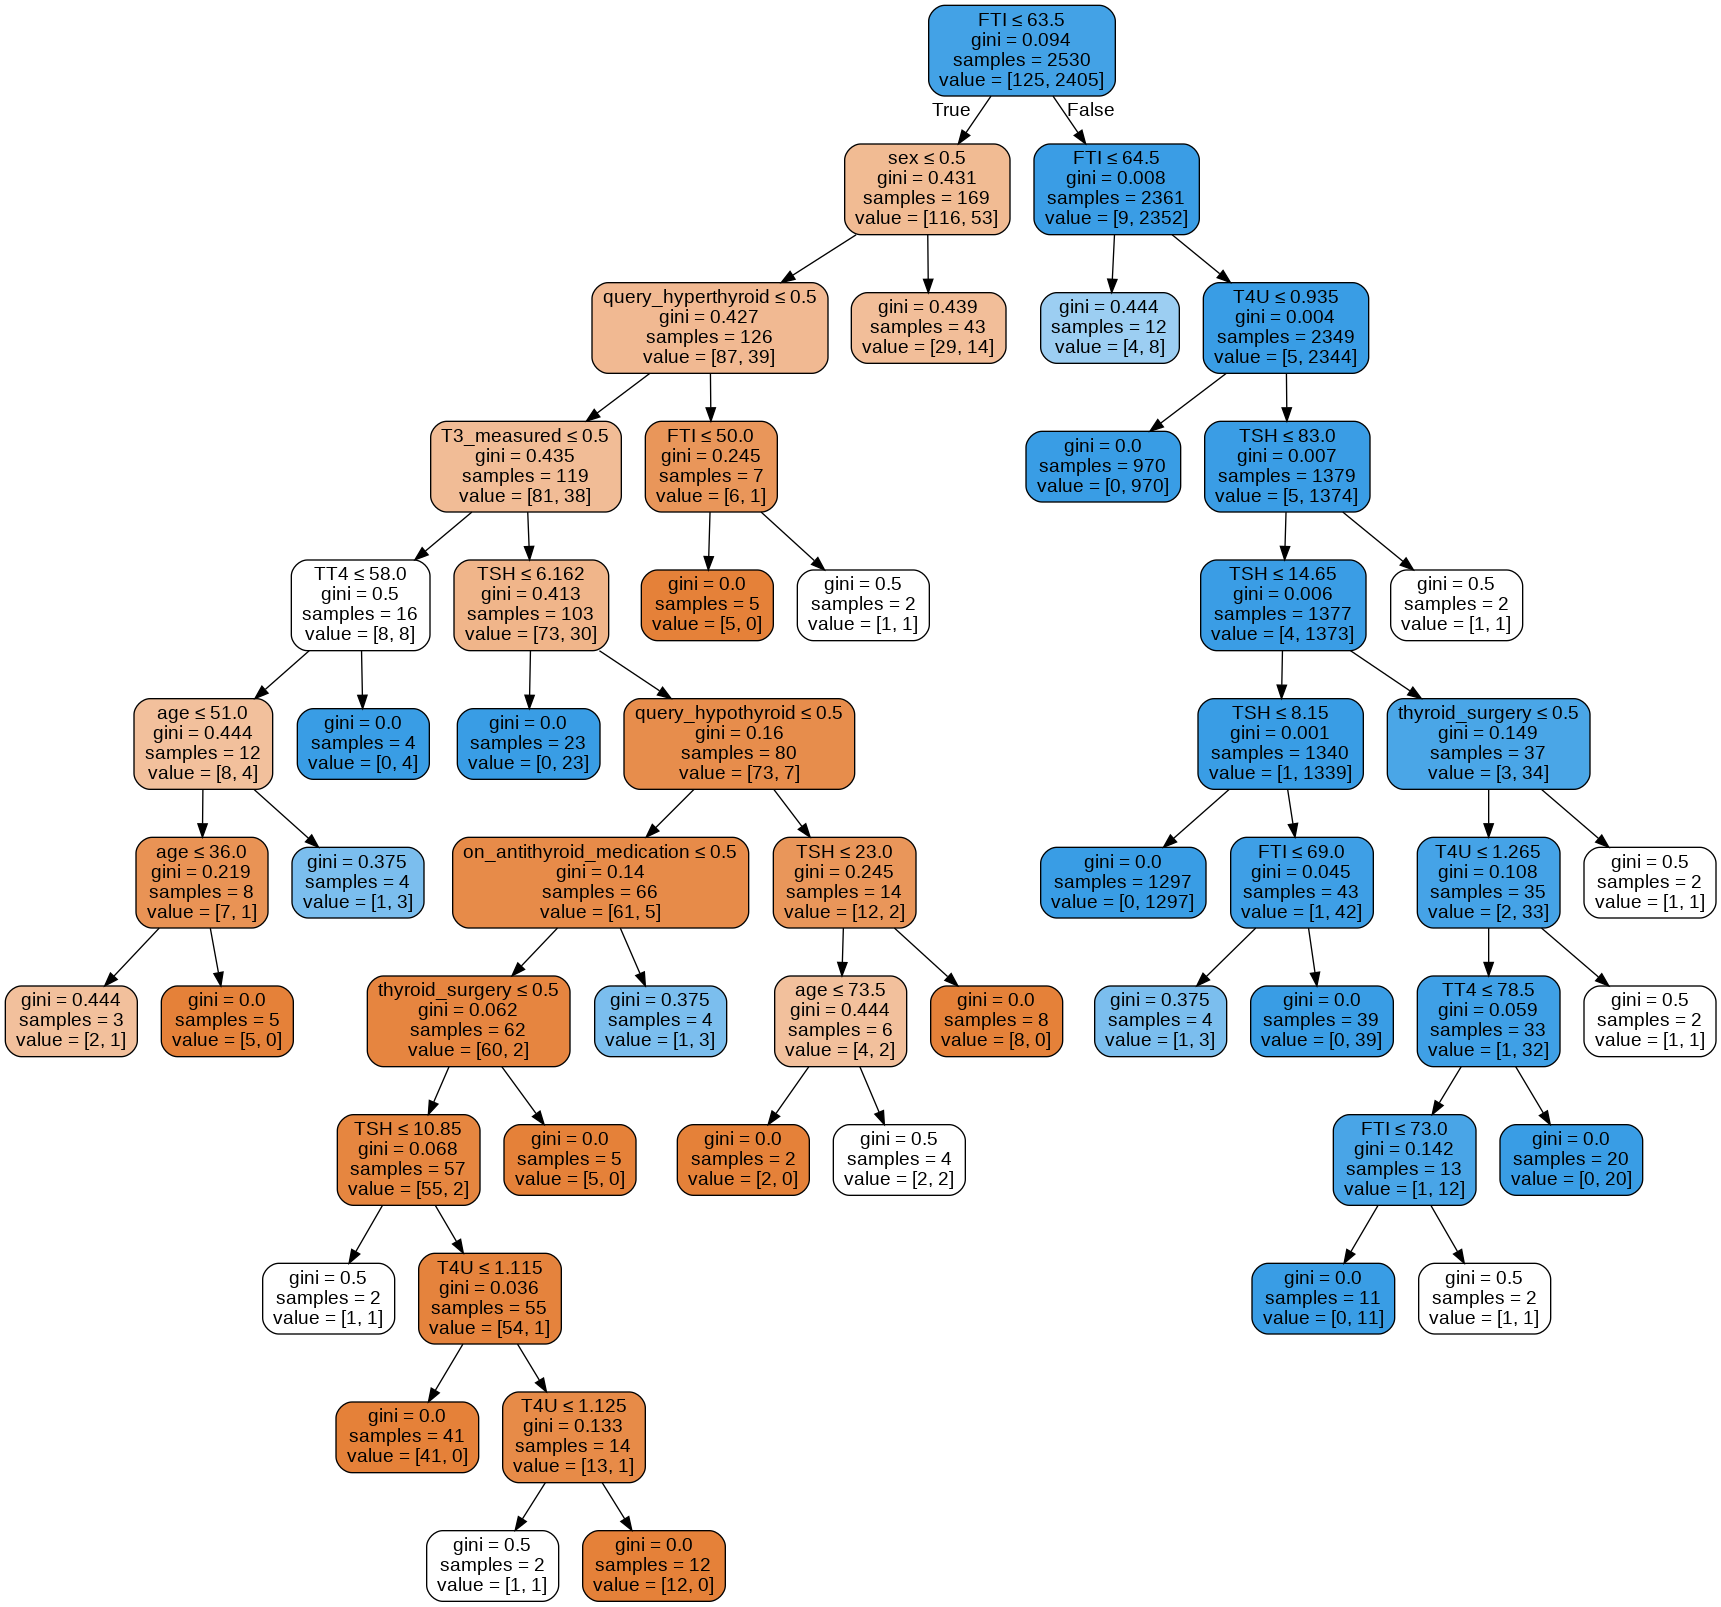

In [34]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
rbc = rfc.estimators_[50]

export_graphviz(rbc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid_forest.png')
Image(graph.create_png())


**GRADIENT BOOSTING MODEL**

In [36]:
# Fitting a GradientBoostingClassifier Model.
gbc = GradientBoostingClassifier()
gbc = gbc.fit(X_train,y_train)
y_predd = gbc.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test,y_predd))

Accuracy Score: 0.9842022116903634


In [37]:
# Defining the Parameter Range
parameters = {
    "n_estimators":[5,50,100,150,200,250,300,350,400,450,500],
    "max_depth":[1,2,3,4,5,6,7,8,9],
    "learning_rate":[0.001,0.0025,0.01,0.025,0.05,0.1,1],
    'max_features': [None,2,3,4,5,6,7,8,9,10]
}

grid = RandomizedSearchCV(estimator=gbc,param_distributions=parameters,cv=10,refit=True)
#Fitting my model
grid.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                   

In [38]:

# Obtaining the best parameters of my model
grid.best_params_

{'learning_rate': 0.025,
 'max_depth': 2,
 'max_features': 7,
 'n_estimators': 450}

In [39]:
# Fitting the Hyperparameters to my GradientBoostingClassifier model
gbc = GradientBoostingClassifier(learning_rate=0.025,n_estimators=450,max_depth=6,max_features=7)
gbc = gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_test)

In [40]:
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print('------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,y_pred))
print('------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))

Accuracy Score: 0.985781990521327
------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.79      0.88      0.84        26
           1       1.00      0.99      0.99       607

    accuracy                           0.99       633
   macro avg       0.89      0.94      0.91       633
weighted avg       0.99      0.99      0.99       633

------------------------------------------------------
Confusion Matrix:
[[ 23   3]
 [  6 601]]


In [41]:
# Obtaining the importance of the features in my model.
feature_scores = pd.Series(gbc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

FTI                          0.352999
TSH                          0.297416
TT4                          0.228563
T3                           0.034639
T4U                          0.027901
age                          0.020293
on_antithyroid_medication    0.011664
on_thyroxine                 0.006390
query_hypothyroid            0.005356
thyroid_surgery              0.004465
TSH_measured                 0.003364
sex                          0.002742
goitre                       0.001204
T3_measured                  0.001109
sick                         0.000877
query_hyperthyroid           0.000422
TT4_measured                 0.000234
TBG_measured                 0.000125
T4U_measured                 0.000088
query_on_thyroxine           0.000079
tumor                        0.000039
pregnant                     0.000028
FTI_measured                 0.000003
lithium                      0.000000
dtype: float64

**ADABOOSTING**

In [63]:
adb = AdaBoostClassifier()
adb = adb.fit(X_train,y_train)
y_predd = adb.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test,y_predd))

Accuracy Score: 0.9889415481832543


In [ ]:
# Defining the Parameter range
param_dist = {
 'n_estimators': [50, 100,150,200,250,300],
 'learning_rate' : [0.001,0.01,0.05,0.1,0.3,1],
 'random_state': [None,20,40,60,100]
 }

grid = GridSearchCV(estimator=abc, param_grid = param_dist,cv=10, refit = True, verbose = 3)
# Fitting the Model
grid.fit(X_train, y_train)

In [65]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 9, 'max_features': 7, 'n_estimators': 450}

In [80]:
# Fitting the Hyperparameters to my GradientBoostingClassifier model
# Fitting the Hyperparameters to my model
adb = AdaBoostClassifier(n_estimators=450,learning_rate=0.1)
adb = adb.fit(X_train,y_train)
y_pred= adb.predict(X_test)

In [81]:
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print('------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,y_pred))
print('------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))

Accuracy Score: 0.9873617693522907
------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        26
           1       1.00      0.99      0.99       607

    accuracy                           0.99       633
   macro avg       0.91      0.94      0.92       633
weighted avg       0.99      0.99      0.99       633

------------------------------------------------------
Confusion Matrix:
[[ 23   3]
 [  5 602]]


**SUPPORT VECTOR MACHINE**

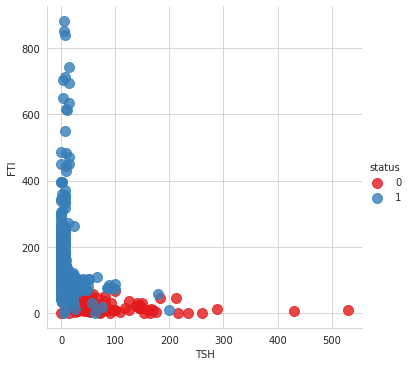

In [42]:
sns.lmplot(x='TSH',y='FTI', data=data, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 100})

In [ ]:
# Standardzing my features using StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

**SVM LINEAR MODEL**

In [57]:

# Fitting a Linear SVM kernel
svl = SVC(kernel='linear')
svl = svl.fit(X_train,y_train)
y_preddd = svl.predict(X_test)
print('Accuracy Score :' , accuracy_score(y_test,y_preddd))


Accuracy Score : 0.976303317535545


In [ ]:
# defining parameter range 
param_grid = {'C': [0.1,0.05, 1,5,7, 10,25 ,50],
              'random_state' : [None,10,20,40,60,100]
}
grid = GridSearchCV(svl, param_grid, refit = True, verbose = 3,cv=10)   
# fitting the model for grid search 
grid.fit(X_train, y_train)

In [ ]:
print("Best Parameters:" , grid.best_params_)

Best Parameters: {'C': 7, 'random_state': None}


In [47]:

# Fitting the Hyperparameters to my model.
svl = SVC(kernel='linear',C=7)
svl = svl.fit(X_train,y_train)
y_preddd = svl.predict(X_test)

In [48]:
print("Accuracy Score:", accuracy_score(y_test,y_preddd))
print('------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,y_preddd))
print('------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_preddd))

Accuracy Score: 0.9747235387045814
------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.71      0.65      0.68        26
           1       0.99      0.99      0.99       607

    accuracy                           0.97       633
   macro avg       0.85      0.82      0.83       633
weighted avg       0.97      0.97      0.97       633

------------------------------------------------------
Confusion Matrix:
[[ 17   9]
 [  7 600]]


**SVM Radial Basis Function Kernel**

In [ ]:
# Fitting an rbf Kernel
svr = SVC(kernel='rbf')
svr = svr.fit(X_train,y_train)
y_preddd = svr.predict(X_test)
print("Accuracy Score:" , accuracy_score(y_test,y_preddd))

Accuracy Score: 0.9715639810426541


In [ ]:
# defining parameter range 
param_grid = {'C': [0.1, 1,5, 10, 50,100, 1000],  
              'gamma': [10,1, 0.1, 0.01, 0.001, 0.0001], 
              'random_state' : [None,10,20,40,60,100]
              }   
grid = GridSearchCV(svr, param_grid, refit = True, verbose = 3,cv=10)   
# fitting the model for grid search 
grid.fit(X_train, y_train)

In [ ]:
print(grid.best_params_)

{'C': 100, 'gamma': 0.01, 'random_state': None}


In [60]:
# Fitting the Hyperparameters to my model.
svr = SVC(kernel='rbf',gamma=0.01,C=3000)
svr = svr.fit(X_train,y_train)
y_preddd = svr.predict(X_test)

In [61]:
print("Accuracy Score:", accuracy_score(y_test,y_preddd))
print('------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,y_preddd))
print('------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_preddd))

Accuracy Score: 0.9684044233807267
------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.71      0.38      0.50        26
           1       0.97      0.99      0.98       607

    accuracy                           0.97       633
   macro avg       0.84      0.69      0.74       633
weighted avg       0.96      0.97      0.96       633

------------------------------------------------------
Confusion Matrix:
[[ 10  16]
 [  4 603]]


**SVM Polynomial Kernel**

In [ ]:
#Fitting a Polynomial Kernel.
svp = SVC(kernel='poly')
svp  = svp.fit(X_train,y_train)
y_preddd = svp.predict(X_test)
print("Accuracy Score :" , accuracy_score(y_test,y_preddd))

Accuracy Score : 0.9699842022116903


In [ ]:
# defining parameter range 
param_grid = {'C': [ 1,5,10,20,25,30],  
              'degree':[2,3,4,]
                      }   
grid = GridSearchCV(svp, param_grid, refit = True, verbose = 3,cv=10)   
# fitting the model for grid search 
grid.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV] C=1, degree=2 ...................................................
[CV] ....................... C=1, degree=2, score=0.980, total=   0.0s
[CV] C=1, degree=2 ...................................................
[CV] ....................... C=1, degree=2, score=0.964, total=   0.0s
[CV] C=1, degree=2 ...................................................
[CV] ....................... C=1, degree=2, score=0.972, total=   0.0s
[CV] C=1, degree=2 ...................................................
[CV] ....................... C=1, degree=2, score=0.980, total=   0.0s
[CV] C=1, degree=2 ...................................................
[CV] ....................... C=1, degree=2, score=0.980, total=   0.0s
[CV] C=1, degree=2 ...................................................
[CV] ....................... C=1, degree=2, score=0.984, total=   0.0s
[CV] C=1, degree=2 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ....................... C=1, degree=2, score=0.976, total=   0.0s
[CV] C=1, degree=2 ...................................................
[CV] ....................... C=1, degree=2, score=0.972, total=   0.0s
[CV] C=1, degree=2 ...................................................
[CV] ....................... C=1, degree=2, score=0.988, total=   0.0s
[CV] C=1, degree=2 ...................................................
[CV] ....................... C=1, degree=2, score=0.964, total=   0.0s
[CV] C=1, degree=3 ...................................................
[CV] ....................... C=1, degree=3, score=0.976, total=   0.0s
[CV] C=1, degree=3 ...................................................
[CV] ....................... C=1, degree=3, score=0.972, total=   0.0s
[CV] C=1, degree=3 ...................................................
[CV] ....................... C=1, degree=3, score=0.976, total=   0.0s
[CV] C=1, degree=3 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    5.8s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10, 20, 25, 30], 'degree': [2, 3, 4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
print('Best Parameters:',grid.best_params_)

Best Parameters: {'C': 20, 'degree': 3}


In [58]:
#Fitting the Hyperparametrs to the model.
svp = SVC(kernel='poly',C=20, degree=3)
svp = svp.fit(X_train,y_train)
y_preddd = svp.predict(X_test)

In [59]:
print("Accuracy Score:", accuracy_score(y_test,y_preddd))
print('------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,y_preddd))
print('------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_preddd))

Accuracy Score: 0.9715639810426541
------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.67      0.62      0.64        26
           1       0.98      0.99      0.99       607

    accuracy                           0.97       633
   macro avg       0.83      0.80      0.81       633
weighted avg       0.97      0.97      0.97       633

------------------------------------------------------
Confusion Matrix:
[[ 16  10]
 [  8 599]]


From our analysis,we can conclude that the SVM performs better with two values compared all the values.The best functioning SVM is the rbf with a performance  of 97%.